#### 动态规划

* 把问题分解为多个阶段，每个阶段对应一个决策。我们记录每一个阶段可达的状态集合（去掉重复的），然后通过当前阶段的状态集合，来推导下一个阶段的状态集合，动态地往前推进（这也是动态规划名字的由来）
* 动态规划比较适合用来求解 *最优问题*，比如求最大值、最小值等等
* 时间复杂度是 O(n*w)。n 表示物品个数，w 表示背包可以承载的总重量
* 空间复杂度：O(w+1)

#### 动态规划问题特征

*一个模型三个特征*

一个模型：
* 动态规划适合解决的问题的模型，把这个模型定义为“多阶段决策最优解模型”

三个特征：
* 最优子结构
  * 最优子结构指的是，问题的最优解包含子问题的最优解 -> 可以通过子问题的最优解，推导出问题的最优解。
  * 如果把最优子结构，也可以理解为，*后面阶段的状态可以通过前面阶段的状态推导出来*
* 无后效性
  * 第一层含义是，在推导后面阶段的状态的时候，只关心前面阶段的状态值，不关心这个状态是怎么一步一步推导出来的。
  * 第二层含义是，某阶段状态一旦确定，就不受之后阶段的决策影响。
  * 无后效性是一个非常“宽松”的要求。只要满足前面提到的动态规划问题模型，其实基本上都会满足无后效性
* 重复子问题
  * 不同的决策序列，到达某个相同的阶段时，可能会产生重复的状态


#### 动态规划解题思路

##### 状态转移表法

一般能用动态规划解决的问题，都可以使用回溯算法的暴力搜素解决。找到重复的子问题之后
* 回溯+缓存（记录已经计算过的子结果，来避免重复子问题的计算）。和动态规划的效率相近
* 状态转移表发法。根据决策的先后过程，根据递推的关系，分阶段填充状态表中的每个状态
  * 如果问题的状态比较犊砸，需要很多变量来表示，那对应的状态表可能是高危的，则不适合用动态规划来解决

##### 状态转移方程法

* 类似递归的解题思路，某个问题如果通过子问题来递归求解，即最优子结构
* 实现方法：
  1. 递归+缓存
  2. 迭代递推
* 状态转移方程式关键：min_dist(i, j) = w[i][j] + min(min_dist(i, j-1), min_dist(i-1, j))



#### 0-1背包

##### 0-1 回溯解决方案
  
~~~

// 回溯算法实现。注意：我把输入的变量都定义成了成员变量。
private int maxW = Integer.MIN_VALUE; // 结果放到maxW中
private int[] weight = {2，2，4，6，3};  // 物品重量
private int n = 5; // 物品个数
private int w = 9; // 背包承受的最大重量
public void f(int i, int cw) { // 调用f(0, 0)
  if (cw == w || i == n) { // cw==w表示装满了，i==n表示物品都考察完了
    if (cw > maxW) maxW = cw;
    return;
  }
  f(i+1, cw); // 选择不装第i个物品
  if (cw + weight[i] <= w) {
    f(i+1,cw + weight[i]); // 选择装第i个物品
  }
}

~~~


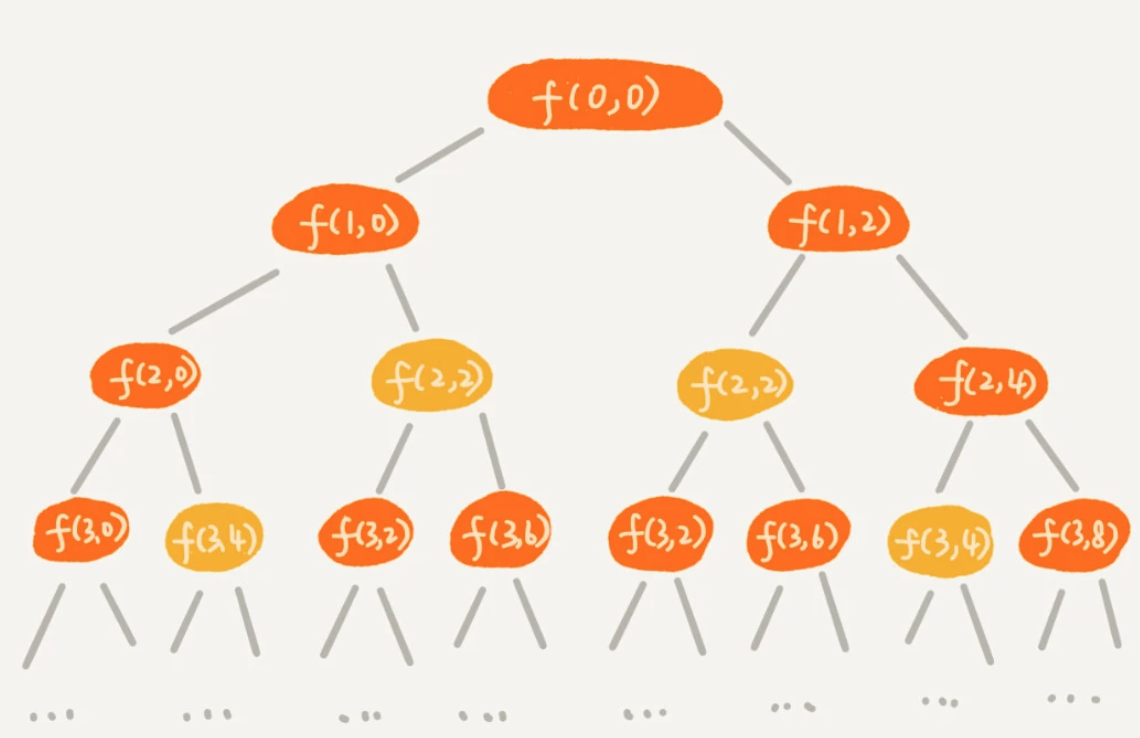

* 递归树中的每个节点表示一种状态，我们用（i, cw）来表示。
  * i 表示将要决策第几个物品是否装入背包
  * cw 表示当前背包中物品的总重量
  * 比如，（2，2）表示我们将要决策第 2 个物品是否装入背包，在决策前，背包中物品的总重量是 2
* 从递归树中，你应该能会发现，有些子问题的求解是重复的
  * 比如图中 f(2, 2) 和 f(3,4) 都被重复计算了两次。
  * 可以借助递归那一节讲的“备忘录”的解决方式，记录已经计算好的 f(i, cw)，当再次计算到重复的 f(i, cw) 的时候，可以直接从备忘录中取出来用，就不用再递归计算了，这样就可以避免冗余计算

~~~

private int maxW = Integer.MIN_VALUE; // 结果放到maxW中
private int[] weight = {2，2，4，6，3};  // 物品重量
private int n = 5; // 物品个数
private int w = 9; // 背包承受的最大重量
private boolean[][] mem = new boolean[5][10]; // 备忘录，默认值false
public void f(int i, int cw) { // 调用f(0, 0)
  if (cw == w || i == n) { // cw==w表示装满了，i==n表示物品都考察完了
    if (cw > maxW) maxW = cw;
    return;
  }
  if (mem[i][cw]) return; // 重复状态
  mem[i][cw] = true; // 记录(i, cw)这个状态
  f(i+1, cw); // 选择不装第i个物品
  if (cw + weight[i] <= w) {
    f(i+1,cw + weight[i]); // 选择装第i个物品
  }
}

~~~


##### 0-1 动态规划

* 把整个求解过程分为n个阶段，每个阶段会决策一个物品是否防盗背包中
* 每个物品决策（放入或者不放入）完之后，背包中的物品的重量会有多重情况，也就是说，会达到多种不同的状态，对应到递归树中，就是很多不同的节点
* 把每一层重复的状态（节点）合并，只记录不同的状态，然后基于上一层状态合集，来推到下一层的状态合集
* 可以通过合并每一层重复的状态，这样就保证每一层不同状态的个数都不会超过 w 个（w 表示背包的承载重量），也就是例子中的 9。于是，我们就成功避免了每层状态个数的指数级增长

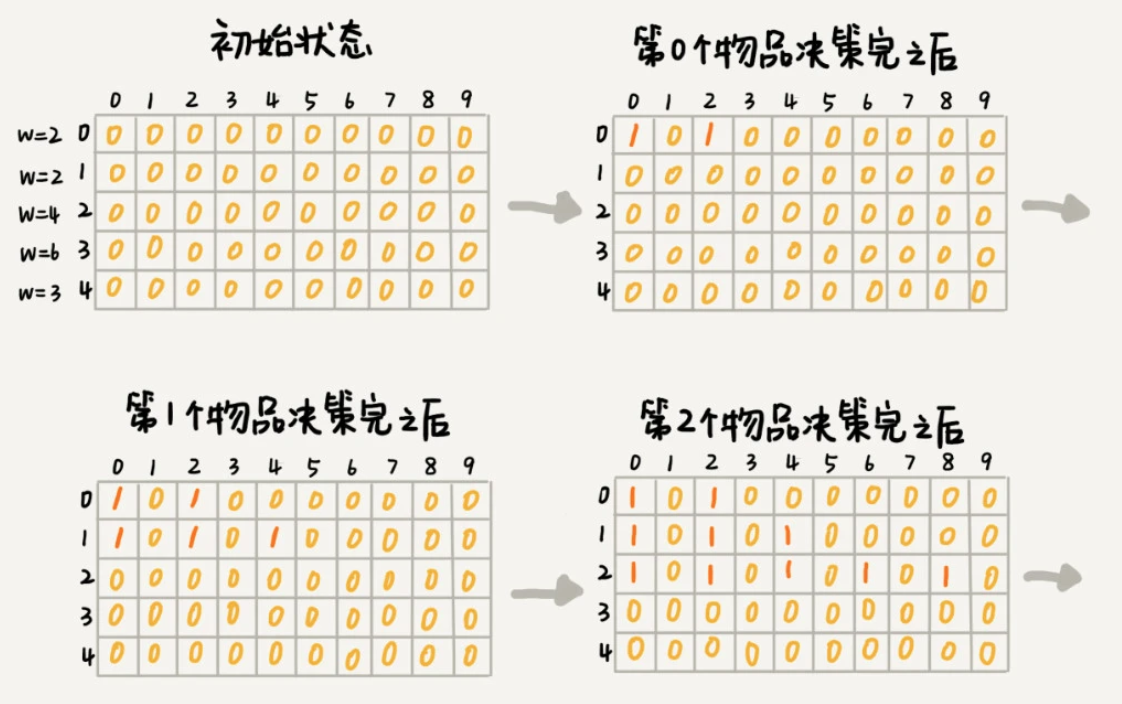
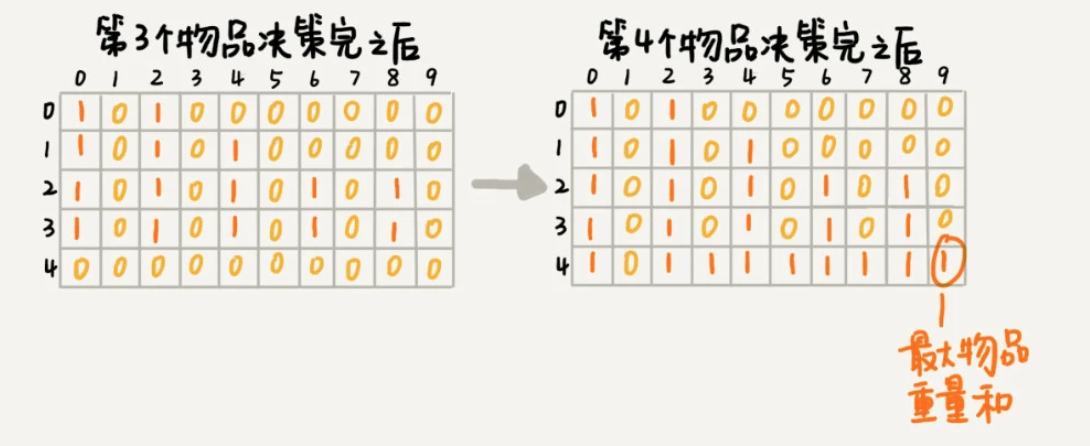


* 用一个二维数组 states[n][w+1] 来记录每层可以达到的不同状态
* 第 0 个（下标从0开始）物品的重量是2，决策完之后，背包中的总重量为0或者2，用 states[0][0]=true 和 states[0][2]=true 来表示两种状态
* 第 1 个物品的重要也是2，基于之前的背包状态，在这个物品决策完后，不同的状态有3个，0(0+0)、2(0+2 or 2+0)、4(2+2)，用 states[1][0]=true，states[1][2]=true、states[1][4] = true 来表示3种状态
* 以此类推，直到考察完所有的物品后，整个 states 状态数组就都计算好了
  * 图中 0 表示 false，1 表示 true。我们只需要在最后一层，找一个值为 true 的最接近 w（这里是 9）的值，就是背包中物品总重量的最大值。

~~~

// weight:物品重量，n:物品个数，w:背包可承载重量
public int knapsack(int[] weight, int n, int w) {
  boolean[][] states = new boolean[n][w+1]; // 默认值false
  states[0][0] = true;  // 第一行的数据要特殊处理，可以利用哨兵优化
  if (weight[0] <= w) {
    states[0][weight[0]] = true;
  }
  for (int i = 1; i < n; ++i) { // 动态规划状态转移
    for (int j = 0; j <= w; ++j) {// 不把第i个物品放入背包
      if (states[i-1][j] == true) states[i][j] = states[i-1][j]; // 当前行的值和上一行一样
    }
    for (int j = 0; j <= w-weight[i]; ++j) {//把第i个物品放入背包
      if (states[i-1][j]==true) states[i][j+weight[i]] = true;
    }
  }
  for (int i = w; i >= 0; --i) { // 输出结果
    if (states[n-1][i] == true) return i;
  }
  return 0;
}

~~~

##### 0-1 动态规划 plus 空间优化 O(w+1)

~~~

public static int knapsack2(int[] items, int n, int w) {
  boolean[] states = new boolean[w+1]; // 默认值false
  states[0] = true;  // 第一行的数据要特殊处理，可以利用哨兵优化
  if (items[0] <= w) {
    states[items[0]] = true;
  }
  for (int i = 1; i < n; ++i) { // 动态规划
    // 特别强调一下代码中的第 8 行，j 需要从大到小来处理。如果我们按照 j 从小到大处理的话，会出现 for 循环重复计算的问题
    for (int j = w-items[i]; j >= 0; --j) {//把第i个物品放入背包
      if (states[j]==true) states[j+items[i]] = true;
    }
  }
  for (int i = w; i >= 0; --i) { // 输出结果
    if (states[i] == true) return i;
  }
  return 0;
}
~~~

##### 0-1 动态规划 plus 物品价值

新引入物品价值这一变量。
对于一组不同重量、不同价值、不可分割的物品，选择将某些物品装入背包，在满足背包最大重量限制的前提下，背包中可装入物品的总价值最大化

##### 回溯

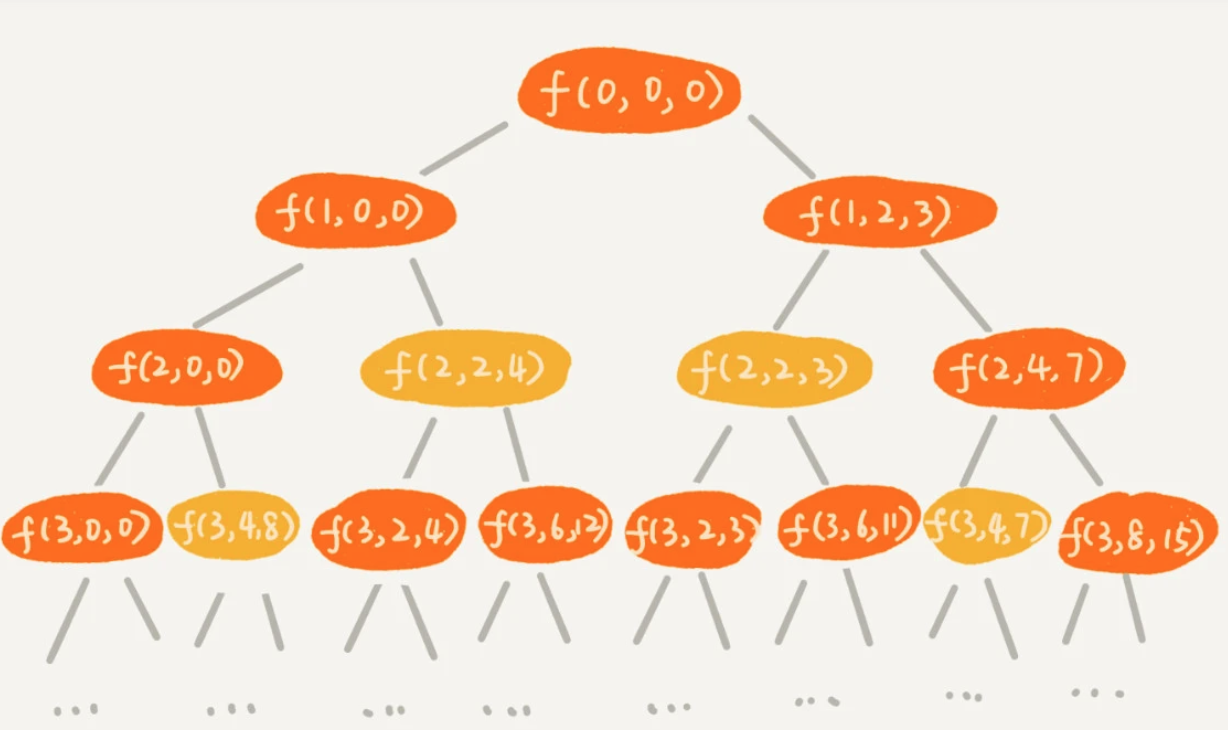

* 在递归树中，有几个节点的 i 和 cw 是完全相同的，比如 f(2,2,4) 和 f(2,2,3)。
* 在背包中物品总重量一样的情况下，f(2,2,4) 这种状态对应的物品总价值更大，可以舍弃 f(2,2,3) 这种状态
* 对于 (i, cw) 相同的不同状态，那我们只需要保留 cv 值最大的那个，继续递归处理，其他状态不予考虑
* 如果用回溯算法，这个问题就没法再用“备忘录”解决了
  * 不带价值的备忘录
    * private boolean[][] mem = new boolean[5][10]; // 备忘录，默认值false
    * if (mem[i][cw]) return; // 重复状态 
    * mem[i][cw] = true; // 记录(i, cw)这个状态
  * 带价值的备忘录
    * 把 new boolean 改成 new Int 不行吗？为什么说不能用备忘录？？

~~~

private int maxV = Integer.MIN_VALUE; // 结果放到maxV中
private int[] items = {2，2，4，6，3};  // 物品的重量
private int[] value = {3，4，8，9，6}; // 物品的价值
private int n = 5; // 物品个数
private int w = 9; // 背包承受的最大重量
public void f(int i, int cw, int cv) { // 调用f(0, 0, 0)
  if (cw == w || i == n) { // cw==w表示装满了，i==n表示物品都考察完了
    if (cv > maxV) maxV = cv;
    return;
  }
  f(i+1, cw, cv); // 选择不装第i个物品
  if (cw + weight[i] <= w) {
    f(i+1,cw+weight[i], cv+value[i]); // 选择装第i个物品
  }
}

~~~


##### 动态规划

// TODO 空间可优化

* 用一个二维数组 states[n][w+1]，来记录每层可以达到的不同状态。
* 不过这里数组存储的值不再是 boolean 类型的了，而是当前状态对应的最大总价值
* 把每一层中 (i, cw) 重复的状态（节点）合并，只记录 cv 值最大的那个状态，然后基于这些状态来推导下一层的状态。

~~~

public static int knapsack3(int[] weight, int[] value, int n, int w) {
  int[][] states = new int[n][w+1];
  for (int i = 0; i < n; ++i) { // 初始化states
    for (int j = 0; j < w+1; ++j) {
      states[i][j] = -1;
    }
  }
  states[0][0] = 0;
  if (weight[0] <= w) {
    states[0][weight[0]] = value[0];
  }
  for (int i = 1; i < n; ++i) { //动态规划，状态转移
    for (int j = 0; j <= w; ++j) { // 不选择第i个物品
      if (states[i-1][j] >= 0) states[i][j] = states[i-1][j];
    }
    for (int j = 0; j <= w-weight[i]; ++j) { // 选择第i个物品
      if (states[i-1][j] >= 0) {
        int v = states[i-1][j] + value[i];
        if (v > states[i][j+weight[i]]) {
          states[i][j+weight[i]] = v;
        }
      }
    }
  }
  // 找出最大值
  int maxvalue = -1;
  for (int j = 0; j <= w; ++j) {
    if (states[n-1][j] > maxvalue) maxvalue = states[n-1][j];
  }
  return maxvalue;
}

~~~

##### 淘宝凑满减

淘宝凑满减，满200-50
* 大于等于 200 的值中最小的 -> 所以 state 不能设置成[n][w+1]
  * 如果要购买的物品的总价格超过 200 太多，比如 1000，那这个羊毛“薅”得就没有太大意义了。所以，我们可以限定 x 值为 1001。（！！！1001 也不合理，暂不深究！！！）
* 最小总价格对应的商品列表


* 代码的前半部分跟 0-1 背包问题没有什么不同
* 状态 (i, j) 只有可能从 (i-1, j) 或者 (i-1, j-value[i]) 两个状态推导过来，所以，我们就检查这两个状态是否是可达的
  * states[i-1][j] 或者 states[i-1][j-value[i]] 是否是 true。
  * 如果 states[i-1][j]可达，就说明我们没有选择购买第 i 个商品
  * 如果 states[i-1][j-value[i]]可达，那就说明我们选择了购买第 i 个商品。
* 我们从中选择一个可达的状态（如果两个都可达，就随意选择一个），然后，继续迭代地考察其他商品是否有选择购买。

~~~

// items商品价格，n商品个数, w表示满减条件，比如200
public static void double11advance(int[] items, int n, int w) {
  boolean[][] states = new boolean[n][3*w+1];//超过3倍就没有薅羊毛的价值了
  states[0][0] = true;  // 第一行的数据要特殊处理
  if (items[0] <= 3*w) {
    states[0][items[0]] = true;
  }
  for (int i = 1; i < n; ++i) { // 动态规划
    for (int j = 0; j <= 3*w; ++j) {// 不购买第i个商品
      if (states[i-1][j] == true) states[i][j] = states[i-1][j];
    }
    for (int j = 0; j <= 3*w-items[i]; ++j) {//购买第i个商品
      if (states[i-1][j]==true) states[i][j+items[i]] = true;
    }
  }

  int j;
  for (j = w; j < 3*w+1; ++j) { 
    if (states[n-1][j] == true) break; // 输出结果大于等于w的最小值
  }
  if (j == 3*w+1) return; // 没有可行解


  for (int i = n-1; i >= 1; --i) { // i表示二维数组中的行，j表示列
    // 假设总价为j，当前商品为 items[i] 元，那么上一层状态 states[i-1][j-items[i]] 需要可达
    // 也就是说 总价j 减去当前商品价格后，剩下的价格需要能用其他商品补足，也就是 上一层 i-1 的 j-items[i] 需要为 true
    if(j-items[i] >= 0 && states[i-1][j-items[i]] == true) {
      System.out.print(items[i] + " "); // 购买这个商品
      j = j - items[i];
    } // else 没有购买这个商品，j不变。
  }
  if (j != 0) System.out.print(items[0]);
}

~~~

##### 最短路径

假设有一个 n 乘以 n 的矩阵 w[n][n]。矩阵存储的都是正整数。棋子起始位置在左上角，终止位置在右下角。我们将棋子从左上角移动到右下角。每次只能向右或者向下移动一位。从左上角到右下角，会有很多不同的路径可以走。我们把每条路径经过的数字加起来看作路径的长度。那从左上角移动到右下角的最短路径长度是多少呢

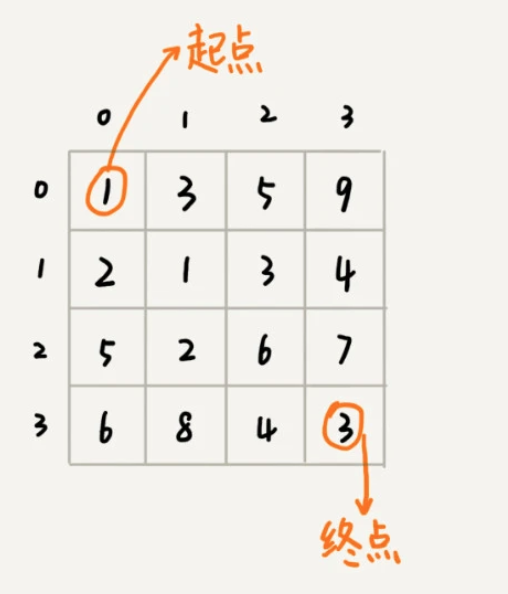

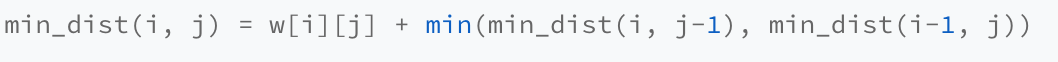

回溯：
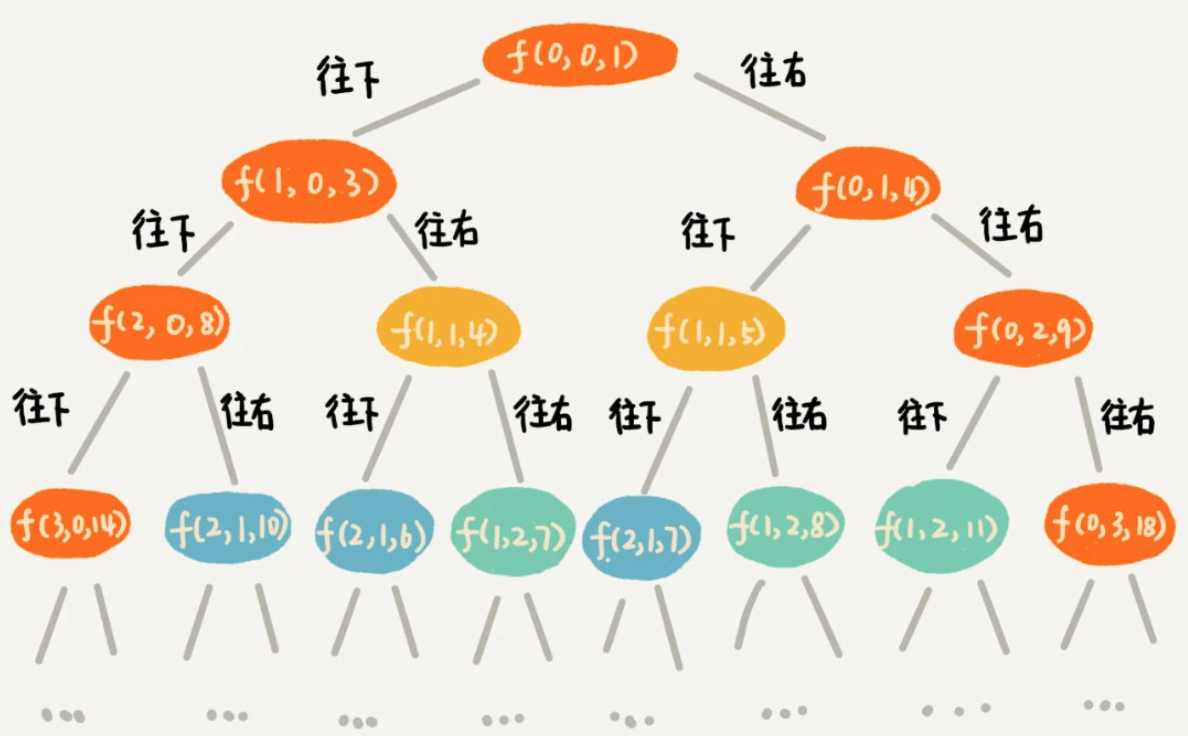
~~~

调用：minDistBT(0,0,w[0][0],w,1)

private int minDist = Integer.MAX_VALUE; // 全局变量或者成员变量
// 调用方式：minDistBacktracing(0, 0, 0, w, n);
public void minDistBT(int i, int j, int dist, int[][] w, int n) {
  // 到达了n-1, n-1这个位置了，这里看着有点奇怪哈，你自己举个例子看下
  if (i == n && j == n) {
    if (dist < minDist) minDist = dist;
    return;
  }
  if (i < n) { // 往下走，更新i=i+1, j=j
    minDistBT(i + 1, j, dist+w[i][j], w, n);
  }
  if (j < n) { // 往右走，更新i=i, j=j+1
    minDistBT(i, j+1, dist+w[i][j], w, n);
  }
}
~~~

存在重复子问题，可以用动态规划来解决

状态表法：
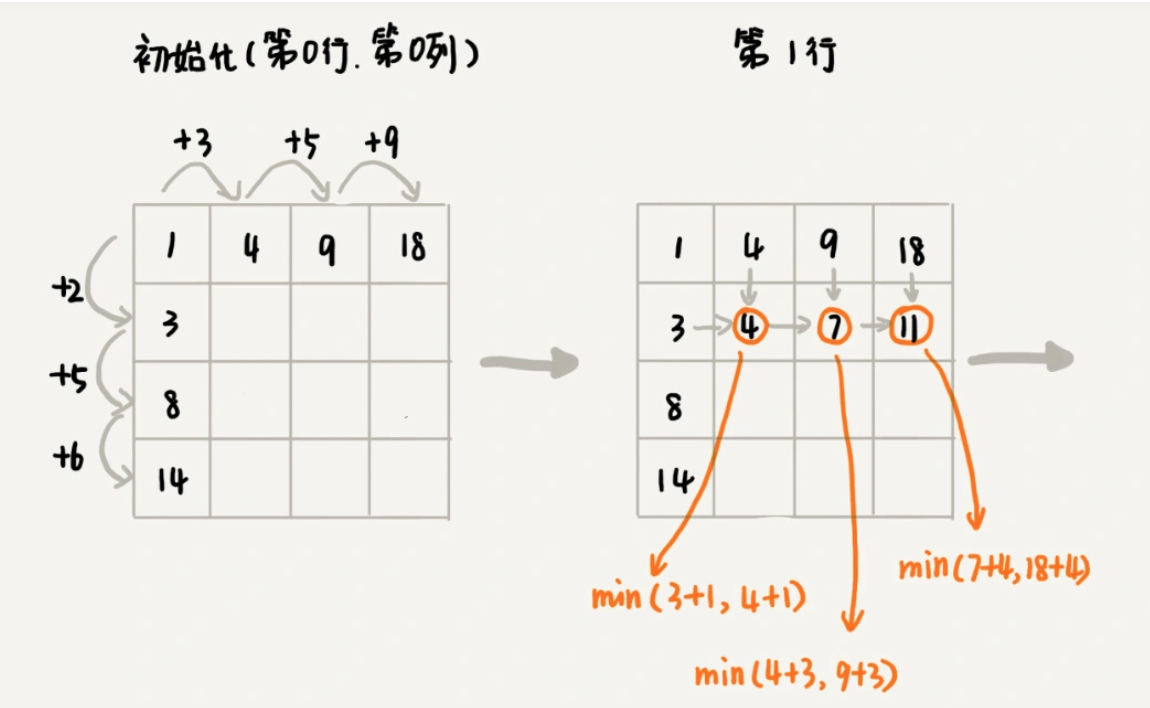

~~~

public int minDistDP(int[][] matrix, int n) {
  int[][] states = new int[n][n];

  // 前进方向只能 → ↓，所以第一列和第一行的数据是可以确定的
  int sum = 0;
  for (int j = 0; j < n; ++j) { // 初始化states的第一行数据
    sum += matrix[0][j];
    states[0][j] = sum;
  }
  sum = 0;
  for (int i = 0; i < n; ++i) { // 初始化states的第一列数据
    sum += matrix[i][0];
    states[i][0] = sum;
  }
  for (int i = 1; i < n; ++i) {
    for (int j = 1; j < n; ++j) {
      states[i][j] = 
            matrix[i][j] + Math.min(states[i][j-1], states[i-1][j]);
    }
  }
  return states[n-1][n-1];
}

~~~

状态方程法：

~~~

private int[][] matrix = 
         {{1，3，5，9}, {2，1，3，4}，{5，2，6，7}，{6，8，4，3}};
private int n = 4;
private int[][] mem = new int[4][4];
public int minDist(int i, int j) { // 调用minDist(n-1, n-1);
  if (i == 0 && j == 0) return matrix[0][0];
  if (mem[i][j] > 0) return mem[i][j];
  int minLeft = Integer.MAX_VALUE;
  if (j-1 >= 0) {
    minLeft = minDist(i, j-1);
  }
  int minUp = Integer.MAX_VALUE;
  if (i-1 >= 0) {
    minUp = minDist(i-1, j);
  }
  
  int currMinDist = matrix[i][j] + Math.min(minLeft, minUp);
  mem[i][j] = currMinDist;
  return currMinDist;
}

~~~
